<a href="https://colab.research.google.com/github/agrigoridou/Tokenization-Zipf-s-Law-N-gram-Models/blob/main/%CE%91_Tokens%2C_Types%2C_Zipf%E2%80%99s_Law_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Προαπαιτούμενες βιβλιοθήκες

In [ ]:
# Εγκατάσταση των βιβλιοθηκών
!pip install nltk spacy transformers
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Φόρτωση του αρχείου

In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
with open("/content/drive/MyDrive/Tokenization-Zipf-s-Law-N-gram-Models/wsj_untokenized.txt", "r") as file:
    text = file.read()


In [43]:
# Ελέγχουμε αν το κείμενο διαβάζεται σωστά
print(f"Κείμενο από το αρχείο:\n{text[:500]}...")  # Εκτύπωση πρώτων 500 χαρακτήρων για έλεγχο


Κείμενο από το αρχείο:
 Pierre Vinken, 61 years old, will join the board as a nonexecutive director Nov. 29. Mr. Vinken is chairman of Elsevier N.V., the Dutch publishing group. Rudolph Agnew, 55 years old and former chairman of Consolidated Gold Fields PLC, was named a nonexecutive director of this British industrial conglomerate. A form of asbestos once used to make Kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than 30 years ago, researchers reported...


In [ ]:
#e.x
text = "to be or not to be"

# Tokenization με NLTK, spaCy και HuggingFace

## NLTK Tokenization

Χρήση του nltk.word_tokenize() από το NLTK

In [44]:
import nltk
nltk.download('punkt_tab')


from nltk.tokenize import word_tokenize

# Tokenization με NLTK
tokens_nltk = word_tokenize(text)
types_nltk = set(tokens_nltk)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Στο παραπάνω παράδειγμα, πρώτα κατεβάζουμε το απαραίτητο πακέτο 'punkt' από το NLTK, και στη συνέχεια εφαρμόζουμε το word_tokenize για τον τεμαχισμό του κειμένου. Το αποτέλεσμα αποθηκεύεται στον πίνακα tokens_nltk, ενώ τα μοναδικά tokens αποθηκεύονται στο types_nltk.

## spaCy Tokenization

Χρήση του en_core_web_sm μοντέλου από το spaCy

In [45]:
import spacy

# Φόρτωμα του spaCy μοντέλου
nlp = spacy.load("en_core_web_sm")

# Tokenization με spaCy
doc = nlp(text)
tokens_spacy = [token.text for token in doc]
types_spacy = set(tokens_spacy)


Σε αυτή τη μέθοδο, φορτώνουμε το μοντέλο και στη συνέχεια δημιουργούμε το αντικείμενο doc, το οποίο περιέχει τα tokens του κειμένου. Ο τεμαχισμός γίνεται μέσω της αναλυτικής λειτουργίας του spaCy.

## BERT Tokenization

Χρήση του BertTokenizer από το HuggingFace

In [46]:
from transformers import BertTokenizer

# Φόρτωμα του BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Tokenization με HuggingFace BERT
tokens_bert = tokenizer.tokenize(text)
types_bert = set(tokens_bert)


Ο BertTokenizer δημιουργεί tokens χρησιμοποιώντας το λεξιλόγιο του BERT και τη μέθοδο byte-pair encoding (BPE), η οποία επιτρέπει τον τεμαχισμό σε υπολέξεις.

# 1. Πίνακες με Tokens και Types


In [47]:
import math
import pandas as pd

# Δημιουργία πίνακα με τα αποτελέσματα
data = {
    'Method': ['NLTK', 'spaCy', 'BERT'],
    'Tokens Count': [len(tokens_nltk), len(tokens_spacy), len(tokens_bert)],
    'Types Count': [len(types_nltk), len(types_spacy), len(types_bert)],
}

df = pd.DataFrame(data)
df


,Method,Tokens Count,Types Count
0,NLTK,93530,12000
1,spaCy,95894,11477
2,BERT,112325,10266


Αυτός ο πίνακας μας δείχνει το πλήθος των tokens και types που παράγονται από κάθε μέθοδο. Τα αποτελέσματα αυτά είναι χρήσιμα για να κατανοήσουμε τη διαφορά στις μεθόδους tokenization, ειδικά όσον αφορά το πλήθος των μοναδικών tokens (types).

# 2. Τυχαία πρόταση και τα Tokens

Επιλέγουμε μία τυχαία πρόταση με τουλάχιστον 10 tokens και παραθέτουμε τα tokens για κάθε μέθοδο tokenization.

In [63]:
import pandas as pd

# Επιλογή τυχαίας πρότασης με τουλάχιστον 10 tokens
sentences = text.split('.')  # Διαχωρίζουμε το κείμενο σε προτάσεις
random_sentence = random.choice([s for s in sentences if len(s.split()) >= 10])  # Επιλογή πρότασης με τουλάχιστον 10 tokens

# Tokenization της τυχαίας πρότασης με τις τρεις μεθόδους
tokens_random_nltk = word_tokenize(random_sentence)  # Tokenization με NLTK
tokens_random_spacy = [token.text for token in nlp(random_sentence)]  # Tokenization με spaCy
tokens_random_bert = tokenizer.tokenize(random_sentence)  # Tokenization με BERT

# Δημιουργία του πίνακα με pandas
data  = {
    "Method": ["NLTK", "spaCy", "BERT"],
    "Tokens": [tokens_random_nltk, tokens_random_spacy, tokens_random_bert]
}

# Εκτύπωση της τυχαίας πρότασης και του πίνακα με τα tokens
print(f"Random sentence: {random_sentence}")
print("\nTokens for each method:")

df = pd.DataFrame(data)
df


Random sentence:  Many of them recently have been spending a lot of money on public relations and advertising to improve their images, but they should realize that the most important thing is real change, not changing people's perceptions

Tokens for each method:


,Method,Tokens
0,NLTK,"[Many, of, them, recently, have, been, spendin..."
1,spaCy,"[ , Many, of, them, recently, have, been, spen..."
2,BERT,"[Many, of, them, recently, have, been, spendin..."


from matplotlib import pyplot as plt
_df_14['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Method')):
  _plot_series(series, series_name, i)
  fig.legend(title='Method', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_17['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Method'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='Method', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# 3. Πίνακας με τα 20 πιο συχνά Types

Ακολουθεί η ανάλυση για τις 20 πιο συχνές λέξεις (types) για κάθε μέθοδο tokenization, ταξινομημένες κατά φθίνουσα συχνότητα.

In [64]:
from collections import Counter
import pandas as pd

# Υπολογισμός συχνοτήτων
freq_nltk = Counter(tokens_nltk)
freq_spacy = Counter(tokens_spacy)
freq_bert = Counter(tokens_bert)

# 20 πιο συχνά types για κάθε μέθοδο
top_20_nltk = freq_nltk.most_common(20)
top_20_spacy = freq_spacy.most_common(20)
top_20_bert = freq_bert.most_common(20)

# Συνάρτηση για την δημιουργία του πίνακα
def create_frequency_table(top_20, method):
    total_tokens = sum([count for _, count in top_20])  # Συνολικός αριθμός tokens
    data = []

    for index, (word, count) in enumerate(top_20, start=1):
        probability = count / total_tokens  # Υπολογισμός πιθανότητας
        product = index * probability  # Υπολογισμός γινομένου
        data.append([word, count, probability, product])

    df = pd.DataFrame(data, columns=['Type', 'Frequency', 'Probability', 'Index * Probability'])
    df['Method'] = method  # Προσθήκη στήλης με τη μέθοδο
    return df

# Δημιουργία πινάκων για κάθε μέθοδο
df_nltk = create_frequency_table(top_20_nltk, 'NLTK')
df_spacy = create_frequency_table(top_20_spacy, 'spaCy')
df_bert = create_frequency_table(top_20_bert, 'BERT')

# Συνένωση όλων των πινάκων
df_all = pd.concat([df_nltk, df_spacy, df_bert], ignore_index=True)

# Εκτύπωση του τελικού πίνακα
df_all


,Type,Frequency,Probability,Index * Probability,Method
0,",",4823,0.160435,0.160435,NLTK
1,the,4041,0.134422,0.268844,NLTK
2,.,3819,0.127037,0.381112,NLTK
3,of,2312,0.076908,0.307631,NLTK
4,to,2157,0.071752,0.358759,NLTK
5,a,1857,0.061772,0.370634,NLTK
6,in,1563,0.051993,0.363948,NLTK
7,and,1489,0.049531,0.396248,NLTK
8,'',959,0.031901,0.287107,NLTK
9,'s,863,0.028707,0.287073,NLTK


# 4. Ποσοστά των Types που εμφανίζονται 1, 2, ή 3 φορές


Υπολογίζουμε τα ποσοστά των types που εμφανίζονται ακριβώς μία, δύο ή τρεις φορές, και τα συγκρίνουμε με τις προβλέψεις του Νόμου του Zipf.

In [65]:
import pandas as pd

def zipf_prediction(n):
    return 1 / (n * (n + 1))

def calculate_percentages(freq):
    one_time = sum(1 for count in freq.values() if count == 1)
    two_times = sum(1 for count in freq.values() if count == 2)
    three_times = sum(1 for count in freq.values() if count == 3)

    total_types = len(freq)
    return {
        '1 time': one_time / total_types * 100,
        '2 times': two_times / total_types * 100,
        '3 times': three_times / total_types * 100,
    }

# Υπολογισμός για κάθε μέθοδο
percentages_nltk = calculate_percentages(freq_nltk)
percentages_spacy = calculate_percentages(freq_spacy)
percentages_bert = calculate_percentages(freq_bert)

# Προβλέψεις Νόμου Zipf για 1, 2, 3 φορές
zipf_predictions = {
    '1 time': zipf_prediction(1),
    '2 times': zipf_prediction(2),
    '3 times': zipf_prediction(3),
}

# Δημιουργία πίνακα με pandas για τα αποτελέσματα
data = {
    'Method': ['NLTK', 'spaCy', 'BERT'],
    '1 time (%)': [percentages_nltk['1 time'], percentages_spacy['1 time'], percentages_bert['1 time']],
    '2 times (%)': [percentages_nltk['2 times'], percentages_spacy['2 times'], percentages_bert['2 times']],
    '3 times (%)': [percentages_nltk['3 times'], percentages_spacy['3 times'], percentages_bert['3 times']],
    'Zipf 1 time (%)': [zipf_predictions['1 time'] * 100, zipf_predictions['1 time'] * 100, zipf_predictions['1 time'] * 100],
    'Zipf 2 times (%)': [zipf_predictions['2 times'] * 100, zipf_predictions['2 times'] * 100, zipf_predictions['2 times'] * 100],
    'Zipf 3 times (%)': [zipf_predictions['3 times'] * 100, zipf_predictions['3 times'] * 100, zipf_predictions['3 times'] * 100],
}

df = pd.DataFrame(data)
df


,Method,1 time (%),2 times (%),3 times (%),Zipf 1 time (%),Zipf 2 times (%),Zipf 3 times (%)
0,NLTK,52.116667,15.250000,7.525000,50.0,16.666667,8.333333
1,spaCy,50.065348,15.596410,7.702361,50.0,16.666667,8.333333
2,BERT,37.512176,16.793298,9.244107,50.0,16.666667,8.333333


# 5. Διάγραμμα του Νόμου του Zipf

Δημιουργούμε ένα διάγραμμα που συγκρίνει τις πραγματικές συχνότητες των types με τις προβλέψεις του Νόμου του Zipf για διαφορετικές τιμές του παράγοντα
𝛼.

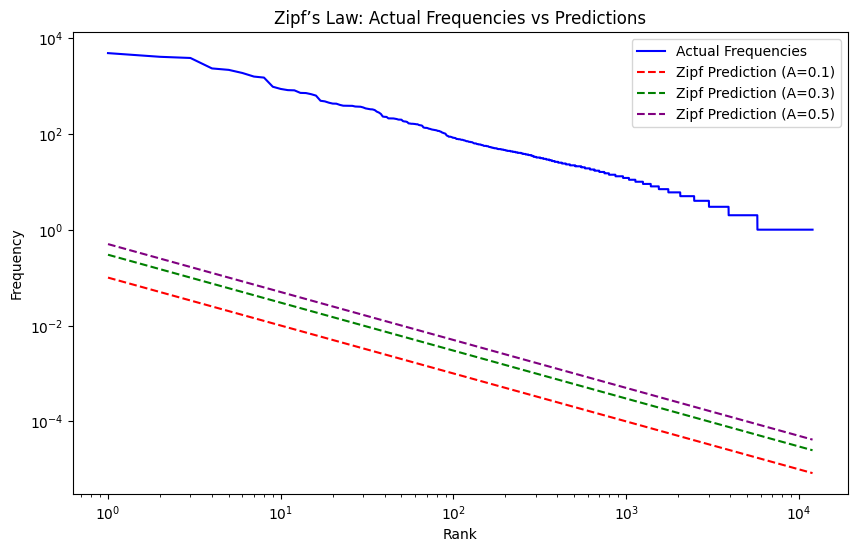

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Υποθέτουμε ότι freq_nltk είναι το Counter αντικείμενο που περιέχει τις συχνότητες των types
# Αν δεν το έχεις ήδη, μπορείς να το δημιουργήσεις με τον εξής τρόπο:
# freq_nltk = Counter(tokens_nltk)  # Υποθέτοντας ότι tokens_nltk είναι οι λέξεις του κειμένου

# Λογαριθμικές συχνότητες και προβλέψεις του Νόμου του Zipf
def zipf_predictions(alpha, num_types):
    ranks = np.arange(1, num_types + 1)
    frequencies = alpha / ranks
    return frequencies

# Υπολογισμός των πραγματικών συχνοτήτων και ταξινόμηση κατά φθίνουσα σειρά
ranks = np.arange(1, len(freq_nltk) + 1)
actual_frequencies_nltk = [count for _, count in freq_nltk.most_common(len(freq_nltk))]

# Δημιουργία διαγράμματος
plt.figure(figsize=(10, 6))
plt.plot(ranks, actual_frequencies_nltk, label='Actual Frequencies', color='blue')

# Προβλέψεις του Νόμου του Zipf για διάφορες τιμές του παράγοντα A
plt.plot(ranks, zipf_predictions(0.1, len(freq_nltk)), label='Zipf Prediction (A=0.1)', color='red', linestyle='dashed')
plt.plot(ranks, zipf_predictions(0.3, len(freq_nltk)), label='Zipf Prediction (A=0.3)', color='green', linestyle='dashed')
plt.plot(ranks, zipf_predictions(0.5, len(freq_nltk)), label='Zipf Prediction (A=0.5)', color='purple', linestyle='dashed')

# Ρυθμίσεις γραφήματος
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()
plt.title('Zipf’s Law: Actual Frequencies vs Predictions')

# Εμφάνιση του γραφήματος
plt.show()


Η πρόβλεψη με A=0.5 είναι πιο κοντά στις πραγματικές μετρήσεις. Αυτό προκύπτει από το διάγραμμα όπου η γραμμή για A=0.5 ακολουθεί πιο στενά την καμπύλη των πραγματικών συχνοτήτων.Συγκρίνοντας τις διαφορετικές γραμμές για τα A = 0.1, A = 0.3, A = 0.5 παρατηρούμε ότι όσο μικρότερο είναι το A, τόσο πιο απότομη είναι η πτώση των συχνοτήτων. Αντίθετα, η γραμμή με A=0.5 παρουσιάζει μια πιο ήπια πτώση, η οποία ταιριάζει καλύτερα με την πραγματική κατανομή των συχνοτήτων στο κείμενο, όπου η συχνότητα των λέξεων δεν μειώνεται τόσο απότομα.



